<h1><center>Comprendiendo un poco más el PCA (Principal Component Analysis)</center></h1>

---

<h3><center>Introducción a PCA</center></h3>

---

Imaginemos que queremos predecir los precios de alquiler de vivienda del mercado....

<img src="https://static.wixstatic.com/media/a27d24_bdfd5ebe2abb4dda8c0c79ec47b7436d~mv2.jpg/v1/fit/w_344,h_332,al_c,q_80/file.png" align="center"/>

Al recopilar información de diversas fuentes tendremos en cuenta variables como tipo de vivienda, tamaño de vivienda, antigüedad, servicios, habitaciones, con/sin jardín, con/sin piscina, con/sin muebles...  

Pero también podemos tener en cuenta la distancia al centro, si hay colegio en las cercanías, o supermercados, si es un entorno ruidoso, si tiene autopistas en las cercanías, la “seguridad del barrio”, si se aceptan mascotas, tiene wifi, tiene garaje, trastero… y seguir y seguir sumando variables.

<h3><center>Es posible que cuanta más (y mejor) información, obtengamos una predicción más acertada.</center></h3>

Pero también empezaremos a notar que la ejecución de nuestro algoritmo seleccionado (regresión lineal, redes neuronales, etc.) empezará a tomar más y más tiempo y recursos. Es posible que algunas de las variables sean menos importantes y no aporten demasiado valor a la predicción. También podríamos acercarnos peligrosamente a causar overfitting al modelo.

---

Al quitar variables estaríamos haciendo Reducción de Dimensiones. Al hacer Reducción de Dimensiones (las características) tendremos menos relaciones entre variables a considerar. Para reducir las dimensiones podemos hacer dos cosas:

   * Eliminar por completo dimensiones
   * Extracción de Características

---

Eliminar por completo algunas dimensiones no estaría mal, pero deberemos tener certeza en que estamos quitando dimensiones poco importantes. Por ejemplo para nuestro ejemplo, podemos suponer que el precio de alquiler no cambiará mucho si el dueño acepta mascotas en la vivienda. Podría ser un acierto o podríamos estar perdiendo información importante.

---

En la Extracción de Características si tenemos 10 características crearemos otras 10 características nuevas independientes en donde cada una de esas “nuevas” características es una combinación de las 10 características “viejas”. Al crear estas nuevas variables independientes lo haremos de una manera específica y las pondremos en un orden de “mejor a peor” sean para predecir a la variable dependiente.

<h4><center>¿Y la reducción de dimensiónes? te preguntarás....</center></h4>

Bueno, intentaremos mantener todas las variables posibles, pero prescindiremos de las menos importantes. Como tenemos las variables ordenadas de “mejor a peores predictoras” ya sabemos cuales serán las más y menos valiosas. A diferencia de la eliminación directa de una característica “vieja”, nuestras nuevas variables son combinaciones de todas las variables originales, aunque eliminemos algunas, estaremos manteniendo la información útil de todas las variables iniciales.

---
---
---

<h2><center>¿Qué es Principal Component Analysis?</center></h2>


---
Entonces PCA es una técnica de Extracción de Características donde combinamos las entradas de una manera específica y podemos eliminar algunas de las variables “menos importantes” manteniendo la parte más importante todas las variables. Como valor añadido, luego de aplicar PCA conseguiremos que todas las nuevas variables sean independientes una de otra.

---

¿Cómo funciona PCA?

En resumen lo que hace el algoritmo es:

   * Estandarizar los datos de entrada (ó Normalización de las Variables)
   * Obtener los autovectores y autovalores de la matriz de covarianza
   * Ordenar los autovalores de mayor a menor y elegir los “k” autovectores que se correspondan con los autovectores “k” más grandes (donde “k” es el número de dimensiones del nuevo subespacio de características).
   * Construir la matriz de proyección W con los “k” autovectores seleccionados.
   * Transformamos el dataset original “X estandarizado” vía W para obtener las nuevas características k-dimensionales.

Tranquilos, que todo esto ya lo hace solito scikit-learn (u otros paquetes Python). Ahora que tenemos las nuevas dimensiones, deberemos seleccionar con cuales nos quedamos.

---
<h3><center>Selección de los Componentes Principales</center></h3>

Típicamente utilizamos PCA para reducir dimensiones del espacio de características original (aunque PCA tiene más aplicaciones). Hemos rankeado las nuevas dimensiones de “mejor a peor reteniendo información”. Pero ¿cuantas elegir para obtener buenas predicciones, sin perder información valiosa? Podemos seguir 3 métodos:

* **Método 1**: Elegimos arbitrariamente “las primeras n dimensiones” (las más importantes). Por ejemplo si lo que queremos es poder graficar en 2 dimensiones, podríamos tomar las 2 características nuevas y usarlas como los ejes X e Y.

* **Método 2**: calcular la “proporción de variación explicada“ de cada característica  e ir tomando dimensiones hasta alcanzar un mínimo que nos propongamos, por ejemplo hasta alcanzar a explicar el 85% de la variabilidad total.

* **Método 3**: Crear una gráfica especial llamada scree plot -a partir del Método 2- y seleccionar cuántas dimensiones usaremos por el método “del codo” en donde identificamos visualmente el punto en donde se produce una caída significativa en la variación explicada relativa a la característica anterior.


---
<h3><center>¿Pero… porqué funciona PCA?</center></h3>

Suponiendo nuestras características de entrada estandarizadas como la matriz $Z$ y $Z^T$ su transpuesta, cuando creamos la matriz de covarianza $Z^TZ$ es una matriz que contiene estimados de cómo cada variable de $Z$ se relaciona con cada otra variable de $Z$. Comprender como una variable es asociada con otra es importante!

Los autovectores representan dirección. Los autovalores representan magnitud. A mayores autovalores, se correlacionan direcciones más importantes.

Por último asumimos que a más variabilidad en una dirección particular se correlaciona con explicar mejor el comportamiento de una variable dependiente. Mucha variabilidad usualmente  indica “Información” mientras que poca variabilidad indica “Ruido”.

---
<h3><center>Ejemplo</center></h3>

---

En este ejemplo:

   * normalizamos los datos de entrada,
   * aplicamos PCA
   * veremos que con 5 de las nuevas dimensiones (y descartando 4) obtendremos
       * hasta un 85% de variación explicada y
       * buenas predicciones.
   * Realizaremos 2 gráficas:
       * una con el acumulado de variabilidad explicada y
       * una gráfica 2D, en donde el eje X e Y serán los 2 primero componentes principales obtenidos por PCA.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
#cargamos los datos de entrada
dataframe = pd.read_csv("comprar_alquilar.csv")
dataframe.tail(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
192,4653,1024,447,703,16952,392957,0,0,3,0
193,3390,881,194,584,34601,304112,2,2,5,0
194,2969,623,72,620,29663,289205,2,2,6,0
195,4169,1292,48,333,28503,239872,2,1,7,1
196,4054,1095,371,440,22183,223971,1,0,3,0
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0
201,3988,1157,105,382,11980,257580,0,0,4,0


In [5]:
#normalizamos los datos
scaler=StandardScaler()
df = dataframe.drop(['comprar'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo

In [6]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" 
#ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

shape of X_pca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


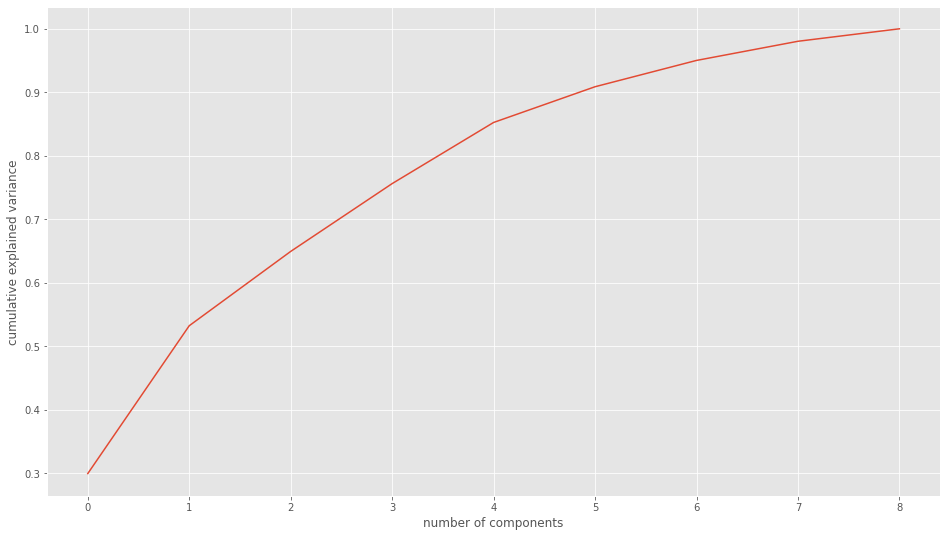

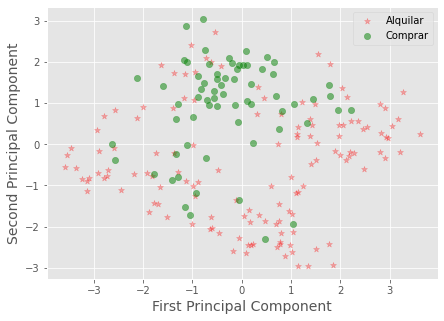

In [7]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(expl))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
 
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

<img src="http://alexhwilliams.info/itsneuronalblog/img/pca/pca_3.png"/>

---
<h3><center>Resultados de PCA en el mundo real</center></h3>

---


Para concluir, les comentaré un ejemplo muy interesante que vi para demostrar la eficacia de aplicar [PCA](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60). Si recuerdan el ejercicio “clásico” MNIST (algunos le llaman el **Hello Word de Machine Learning**), donde tenemos un conjunto de 70.000 imágenes con números “a mano” del 0 al 9 y debemos reconocerlos utilizando alguno de los algoritmos de clasificación.

Pues en el caso de MNIST, nuestras características de entrada son las imágenes de 28×28 pixeles, lo que nos da un total de 748 dimensiones de entrada. Ejecutar Regresión Logística se puede lograr una precisión del 91%.

---

Aplicando PCA al MNIST con una varianza retenida del 90% logramos reducir las dimensiones de 748 a 236. Ejecutan Regresión Logística otra vez y la precisión obtenida sigue siendo del 91% !!! Ventajas? Mejora de tiempos de ejecución durante la fase de entrenamiento y menor ruido...

---
<h3><center>Contras de PCA y variantes</center></h3>

---

No todo es perfecto en la vida ni en PCA. Como contras, debemos decir que el algoritmo de PCA es muy influenciado por los **outliers en los datos**. Por esta razón, surgieron variantes de [PCA](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/) para minimizar esta debilidad. Entre otros se encuentran: [RandomizedPCA](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.decomposition.RandomizedPCA.html), [SparcePCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html) y [KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html). También, [Linear Discriminant Analysis (LDA)](https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2) y otra cosa rara.... [Autoencoders](https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/) para imágenes quizá?

Por último decir que PCA fue creado en 1933 y ha surgido una buena alternativa en 2008 llamada [t-SNE](https://sitiobigdata.com/2018/08/27/algoritmo-t-sne-con-python/) con un enfoque distinto...